# Test predictions of DiffprofPop

In [1]:
import matplotlib.cm as cm
from time import time
from matplotlib import lines as mlines
import numpy as np

In [2]:
from jax import random as jran
ran_key = jran.PRNGKey(0)

## Inspect DiffprofPop predictions for $M_{\rm halo}=10^{14}M_{\odot}$

In [3]:
tarr = np.linspace(1, 13.8, 200)
p50_arr = np.array((0.1, 0.5, 0.9))
lgm0 = 14
zz = np.zeros_like(tarr)

## Check predictions for $\langle\log_{10}c(t)\vert M_0,p_{50\%}\rangle$

### Call the target data model to compute $\langle\log_{10}c(t)\vert M_0,p_{50\%}\rangle$

In [4]:
from diffprof import target_data_model as tdm

mean_lgc_old_tdm = tdm.approximate_lgconc_vs_lgm_p50(
    tarr, lgm0, p50_arr[0], *tdm.target_data_model_params_mean_lgconc.values())
mean_lgc_mid_tdm = tdm.approximate_lgconc_vs_lgm_p50(
    tarr, lgm0, p50_arr[1], *tdm.target_data_model_params_mean_lgconc.values())
mean_lgc_young_tdm = tdm.approximate_lgconc_vs_lgm_p50(
    tarr, lgm0, p50_arr[2], *tdm.target_data_model_params_mean_lgconc.values())

### Call DiffprofPop to predict $\langle\log_{10}c(t)\vert M_0,p_{50\%}\rangle$

In [5]:
from diffprof.diffprofpop import get_singlemass_params_p50
from diffprof.dpp_predictions import get_predictions_from_singlemass_params_p50
from diffprof.dpp_opt import get_u_param_grids

singlemass_dpp_params = get_singlemass_params_p50(lgm0)
u_param_grids = get_u_param_grids(ran_key, 200)
u_be_grid, u_lgtc_bl_grid = u_param_grids
args = (singlemass_dpp_params, tarr, p50_arr, u_be_grid, u_lgtc_bl_grid)
dpp_preds = get_predictions_from_singlemass_params_p50(*args)
avg_log_conc_p50_dpp, avg_log_conc_lgm0_dpp = dpp_preds[:2]
std_log_conc_lgm0_dpp, std_log_conc_p50_dpp = dpp_preds[2:]

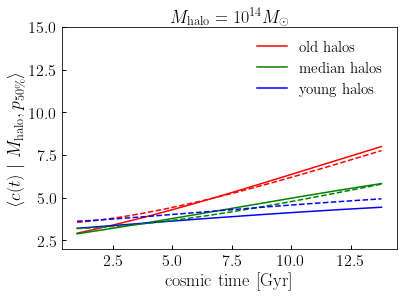

In [6]:
fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(2, 15)
__=ax.plot(tarr, 10**mean_lgc_old_tdm, color='red', label=r'${\rm old\ halos}$')
__=ax.plot(tarr, 10**mean_lgc_mid_tdm, color='green', label=r'${\rm median\ halos}$')
__=ax.plot(tarr, 10**mean_lgc_young_tdm, color='blue', label=r'${\rm young\ halos}$')

__=ax.plot(tarr, 10**avg_log_conc_p50_dpp[0, :], '--', color='red')
__=ax.plot(tarr, 10**avg_log_conc_p50_dpp[1, :], '--', color='green')
__=ax.plot(tarr, 10**avg_log_conc_p50_dpp[2, :], '--', color='blue')


leg = ax.legend()
xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
ylabel = ax.set_ylabel(r'$\langle c(t)\ \vert\ M_{\rm halo}, p_{50\%}\rangle$')
title = ax.set_title(r'$M_{\rm halo}=10^{14}M_{\odot}$')

## Check predictions for $\sigma\left(\log_{10}c(t)\vert M_0,p_{50\%}\right)$

### Call the target data model

In [7]:
std_lgc_old_tdm = tdm._scatter_vs_p50_and_lgmhalo(
    lgm0, p50_arr[0], *tdm.target_data_model_params_std_lgconc_p50.values())
std_lgc_mid_tdm = tdm._scatter_vs_p50_and_lgmhalo(
    lgm0, p50_arr[1], *tdm.target_data_model_params_std_lgconc_p50.values())
std_lgc_young_tdm = tdm._scatter_vs_p50_and_lgmhalo(
    lgm0, p50_arr[2], *tdm.target_data_model_params_std_lgconc_p50.values())

std_lgc_lgm_tdm = tdm.approx_std_lgconc_vs_lgm(
    tarr, lgm0, *tdm.target_data_model_params_std_lgconc.values())

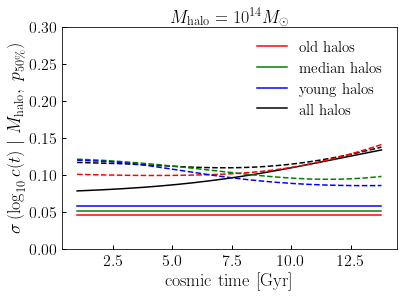

In [8]:
fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0, 0.3)
__=ax.plot(tarr, zz+std_lgc_old_tdm, color='red', label=r'${\rm old\ halos}$')
__=ax.plot(tarr, zz+std_lgc_mid_tdm, color='green', label=r'${\rm median\ halos}$')
__=ax.plot(tarr, zz+std_lgc_young_tdm, color='blue', label=r'${\rm young\ halos}$')

__=ax.plot(tarr, std_lgc_lgm_tdm, color='k', label=r'${\rm all\ halos}$')
__=ax.plot(tarr, std_log_conc_lgm0_dpp, '--', color='k')

__=ax.plot(tarr, std_log_conc_p50_dpp[0, :], '--', color='red')
__=ax.plot(tarr, std_log_conc_p50_dpp[1, :], '--', color='green')
__=ax.plot(tarr, std_log_conc_p50_dpp[2, :], '--', color='blue')

leg = ax.legend()

xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
ylabel = ax.set_ylabel(r'$\sigma\left( \log_{10}c(t)\ \vert\ M_{\rm halo},\ p_{50\%}\right)$')
title = ax.set_title(r'$M_{\rm halo}=10^{14}M_{\odot}$')